In [10]:
import pandas as pd
import numpy as np
import requests
import json
import pprint as pprint


In [15]:
df = pd.read_csv("Resources/meteorite-landings.csv")
df.shape
# df.tail()

(45716, 10)

In [12]:
#Create copy of data removing columns
df = df[["name","mass","fall","year","reclat","reclong","GeoLocation"]].copy(deep=True)
df.head()

,name,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [13]:
# 0N/0E Removing 0 0 and removing NaNs 
df = df[(df["reclong"] != 0) & (df["reclat"] != 0)].dropna(axis=0, how="any")
df.count()

name           31706
mass           31706
fall           31706
year           31706
reclat         31706
reclong        31706
GeoLocation    31706
dtype: int64

<AxesSubplot:xlabel='year'>

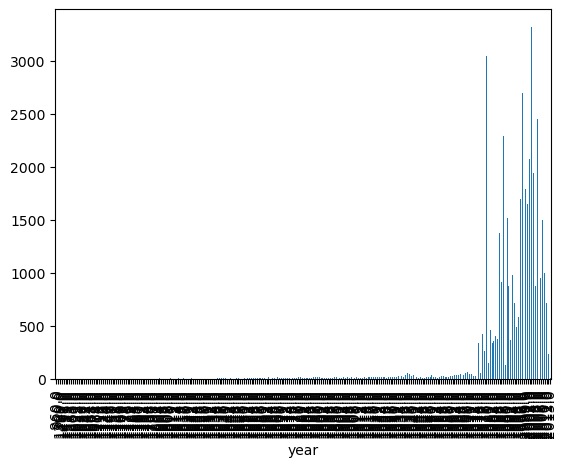

In [18]:
#Removing year before 860 ce or after 2016
#df[df["year"]]
#df = df[(df["year"] > 2016.0)]
df_year = df.loc[(df["year"]>=860) & (df["year"] < 2016.0)]
# df.year.min()
df_year.groupby('year').count()['id'].plot.bar()

